# Credit Card Fraud Detection

This dataset is used to detect the credit card fraud detection. This is a classification problem. This is an imbalanced dataset based on target variable. So In this Project, I will use encoding and decording techniques to balanced dataset.
There are various techniques as follows -
   - Cross Validation Like KFOLD and Hyperpaqrameter Tuning (Logistics Regression )
   - Ensemble Technique - Random Forest
   - Under Sampling
   - Over Sampling
   - SMOTETomek
   - Ensemple Technique - EasyEnsembleClassifier

### Dataset Link 

https://www.kaggle.com/mlg-ulb/creditcardfraud

<hr>

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

%matplotlib inline

## Load and Read Dataset

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Dataset Description

In [3]:
## Shape of the dataset

df.shape

(284807, 31)

In [4]:
## info 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
## Statistics of the dataset

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df['Class'].unique()

array([0, 1], dtype=int64)

##### This is an imbalanced dataset. Target variable outcomes having imbalance values

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Missing Value handling

##### There is no missing value in the dataset

In [8]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Visualization

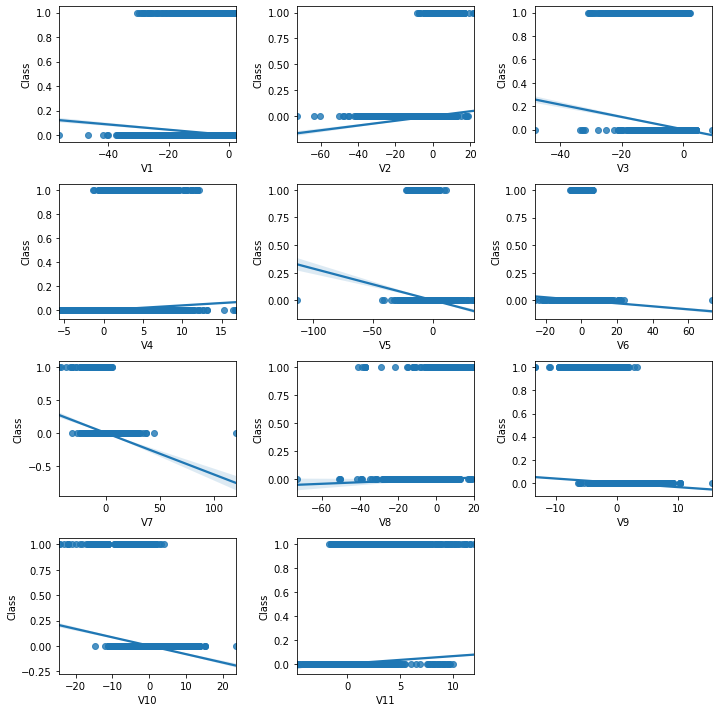

In [35]:
plt.figure(figsize=(10,10))
plotnumber = 1

for col in df.columns[1:-1]:
    if plotnumber < 12:
        plt.subplot(4,3,plotnumber)
        sns.regplot(df[col], df['Class'])
        plt.xlabel(col)
    plotnumber +=1
plt.tight_layout()

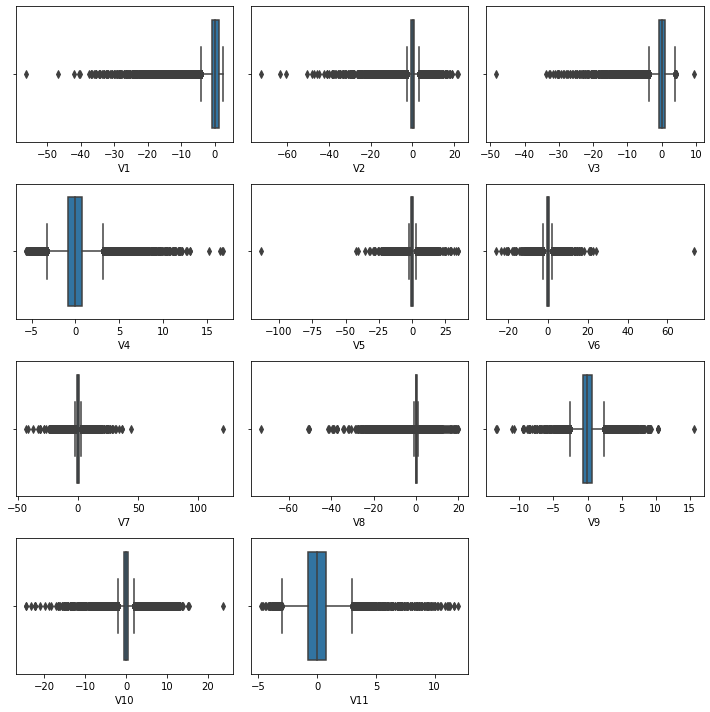

In [36]:
plt.figure(figsize=(10,10))
plotnumber = 1

for col in df.columns[1:-1]:
    if plotnumber < 12:
        plt.subplot(4,3,plotnumber)
        sns.boxplot(df[col])
    plotnumber +=1
plt.tight_layout()

## Independent Variable and Dependent Variable

In [9]:
X = df.drop('Class', axis=1)
y = df['Class']

## Splitting the Dataset into Train & Test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3)

<br>

<hr>

## Imbalanced Dataset Techniques

### 1. Cross Validation Like KFOLD and Hyperpaqrameter Tuning - Logistics Regression

In [11]:
from sklearn.model_selection import KFold

In [12]:
log_class = LogisticRegression()

# Hyperparameters
grid = {'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}

# KFold
cv = KFold(n_splits=5,random_state=None,shuffle=False)

##### Training with GridSearch CV 

In [13]:
log_clf=GridSearchCV(log_class, grid, cv=cv, n_jobs=-1, scoring='f1_macro')
log_clf.fit(X_train,y_train)

c:\users\agraw\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

##### model evaluation

In [14]:
y_pred = log_clf.predict(X_test)

print('Confustion Matrix : \n\n', confusion_matrix(y_test,y_pred))
print('\n Accuracy Score : ', accuracy_score(y_test,y_pred))
print('\n Classification Report : \n \n', classification_report(y_test,y_pred))

Confustion Matrix : 

 [[85234    64]
 [   41   104]]

 Accuracy Score :  0.9987711105649381

 Classification Report : 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85298
           1       0.62      0.72      0.66       145

    accuracy                           1.00     85443
   macro avg       0.81      0.86      0.83     85443
weighted avg       1.00      1.00      1.00     85443



##### This is not a good technique to handle the imbalanced dataset. Precision and recall is very less. So I will try other techniques

<hr>

### 2. Random Forest Classifier

In [15]:
RF_clf = RandomForestClassifier()

RF_clf.fit(X_train,y_train)

RandomForestClassifier()

In [16]:
y_pred = RF_clf.predict(X_test)

print('Confustion Matrix : \n\n', confusion_matrix(y_test,y_pred))
print('\n Accuracy Score : ',   accuracy_score(y_test,y_pred))
print('\n Classification Report : \n \n', classification_report(y_test,y_pred))

Confustion Matrix : 

 [[85290     8]
 [   33   112]]

 Accuracy Score :  0.9995201479348805

 Classification Report : 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85298
           1       0.93      0.77      0.85       145

    accuracy                           1.00     85443
   macro avg       0.97      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443



##### This is a good technique to handle the imbalaned dataset. But I will go further for other techniques to obtain best performance

<hr>

### 3. Under Sampling

In under sampling, reduced the dataset size (records) of higher class to balanced the ratio. It reduced the size to dataset So it is not a good apporach for small dataset

In [17]:
from collections import Counter
Counter(y_train)

Counter({0: 199017, 1: 347})

In [18]:
from imblearn.under_sampling import NearMiss

ns=NearMiss(0.8)

X_train_ns,y_train_ns=ns.fit_sample(X_train,y_train)

print("The number of classes before fit {} ".format(Counter(y_train)))
print("The number of classes after fit {} ".format(Counter(y_train_ns)))

c:\users\agraw\appdata\local\programs\python\python38-32\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


The number of classes before fit Counter({0: 199017, 1: 347}) 
The number of classes after fit Counter({0: 433, 1: 347}) 


In [19]:
ns_RF_clf = RandomForestClassifier()

ns_RF_clf.fit(X_train_ns, y_train_ns)

RandomForestClassifier()

In [20]:
y_pred = ns_RF_clf.predict(X_test)

print('Confustion Matrix : \n\n', confusion_matrix(y_test,y_pred))
print('\n Accuracy Score : ',   accuracy_score(y_test,y_pred))
print('\n Classification Report : \n \n', classification_report(y_test,y_pred))

Confustion Matrix : 

 [[64278 21020]
 [   13   132]]

 Accuracy Score :  0.7538358905937291

 Classification Report : 
 
               precision    recall  f1-score   support

           0       1.00      0.75      0.86     85298
           1       0.01      0.91      0.01       145

    accuracy                           0.75     85443
   macro avg       0.50      0.83      0.44     85443
weighted avg       1.00      0.75      0.86     85443



##### As we can see, This is not a good technique to handle an imbalanced dataset

<hr>

### 4. Over Sampling

In over sampling, increase the dataset size (records) of lower class to balanced the ratio. It increase the size to dataset So it can ne a good apporach.

In [21]:
from imblearn.over_sampling import RandomOverSampler

In [22]:
os = RandomOverSampler(0.75)

X_train_ns, y_train_ns = os.fit_sample(X_train, y_train)

print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

c:\users\agraw\appdata\local\programs\python\python38-32\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


The number of classes before fit Counter({0: 199017, 1: 347})
The number of classes after fit Counter({0: 199017, 1: 149262})


In [23]:
os_RF_clf = RandomForestClassifier()

os_RF_clf.fit(X_train_ns, y_train_ns)

RandomForestClassifier()

In [24]:
y_pred = os_RF_clf.predict(X_test)

print('Confustion Matrix : \n\n', confusion_matrix(y_test,y_pred))
print('\n Accuracy Score : ',   accuracy_score(y_test,y_pred))
print('\n Classification Report : \n \n', classification_report(y_test,y_pred))

Confustion Matrix : 

 [[85291     7]
 [   34   111]]

 Accuracy Score :  0.9995201479348805

 Classification Report : 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85298
           1       0.94      0.77      0.84       145

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



##### This is a good also a good technique to handle the imbalanced dataset. 

<hr>

### 5. SMOTETomek

In [25]:
from imblearn.combine import SMOTETomek

In [26]:
smt = SMOTETomek(0.75)

X_train_ns, y_train_ns = smt.fit_sample(X_train,y_train)

print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

c:\users\agraw\appdata\local\programs\python\python38-32\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


The number of classes before fit Counter({0: 199017, 1: 347})
The number of classes after fit Counter({0: 198232, 1: 148477})


In [27]:
smt_RF_clf = RandomForestClassifier()

smt_RF_clf.fit(X_train_ns, y_train_ns)

RandomForestClassifier()

In [28]:
y_pred = smt_RF_clf.predict(X_test)

print('Confustion Matrix : \n\n', confusion_matrix(y_test,y_pred))
print('\n Accuracy Score : ',   accuracy_score(y_test,y_pred))
print('\n Classification Report : \n \n', classification_report(y_test,y_pred))

Confustion Matrix : 

 [[85283    15]
 [   24   121]]

 Accuracy Score :  0.9995435553526912

 Classification Report : 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85298
           1       0.89      0.83      0.86       145

    accuracy                           1.00     85443
   macro avg       0.94      0.92      0.93     85443
weighted avg       1.00      1.00      1.00     85443



##### This is also a good technique to handle this imbalanced dataset

<hr>

###  6. Ensemble Techniques

In [29]:
from imblearn.ensemble import EasyEnsembleClassifier

In [30]:
easy = EasyEnsembleClassifier()
easy.fit(X_train,y_train)

EasyEnsembleClassifier()

In [31]:
y_pred = easy.predict(X_test)

print('Confustion Matrix : \n\n', confusion_matrix(y_test,y_pred))
print('\n Accuracy Score : ',   accuracy_score(y_test,y_pred))
print('\n Classification Report : \n \n', classification_report(y_test,y_pred))

Confustion Matrix : 

 [[82270  3028]
 [   16   129]]

 Accuracy Score :  0.9643739100921082

 Classification Report : 
 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     85298
           1       0.04      0.89      0.08       145

    accuracy                           0.96     85443
   macro avg       0.52      0.93      0.53     85443
weighted avg       1.00      0.96      0.98     85443



##### This is not a good technique to handle this imbalanced dataset

<hr>

## Conclustion

To handle this imbalanced dataset, following techniques is good
1. Random Forest
2. GridSearchCV with Random Forest
3. Over Sampling
4. SMOTETomek

<hr>